# Loading the data from github

In [279]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/Kolo-Naukowe-Data-Science-PW/Rekrutacja_2023/main/spaceship_titanic/poprawne_dane.csv"

data_raw = pd.read_csv(url)

In [372]:
data_raw.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,F,0,P
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,F,2,S
7,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,F,3,S
8,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,B,1,P
9,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True,B,1,P


In [226]:
len(data_raw)

6466

In [178]:
data_raw.isnull().values.any()

np.False_

# Exploring Categorical Columns

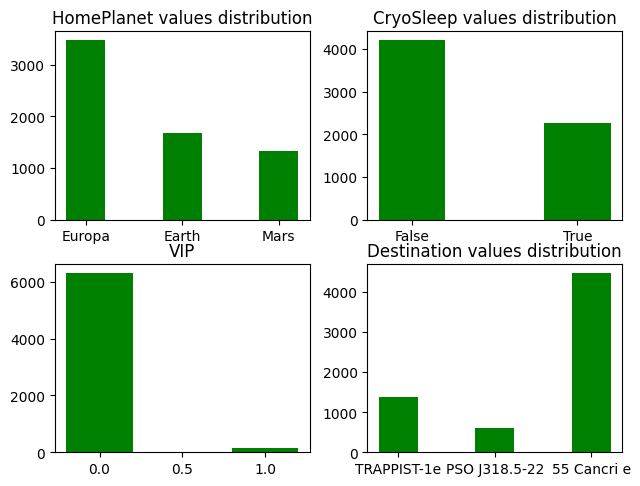

In [228]:
fig, axs = plt.subplots(2,2)
fig.tight_layout()

home_planet_counted_values = np.unique(data_raw["HomePlanet"].values,return_counts=True)[1]
home_planet_unique_values = pd.unique(data_raw["HomePlanet"])


axs[0,0].set_title("HomePlanet values distribution")
axs[0,0].bar(home_planet_unique_values,home_planet_counted_values,width=0.4,color='g')

data_raw['CryoSleep'] = data_raw['CryoSleep'].astype(str)

home_planet_counted_values = np.unique(data_raw["CryoSleep"].values,return_counts=True)[1]
home_planet_unique_values = pd.unique(data_raw["CryoSleep"])

axs[0,1].set_title("CryoSleep values distribution")
axs[0,1].bar(home_planet_unique_values,home_planet_counted_values,width=0.4,color='g')

home_planet_counted_values = np.unique(data_raw["Destination"].values,return_counts=True)[1]
home_planet_unique_values = pd.unique(data_raw["Destination"])
axs[1,1].set_title("Destination values distribution")
axs[1,1].bar(home_planet_unique_values,home_planet_counted_values,width=0.4,color='g')


home_planet_counted_values = np.unique(data_raw["VIP"].values,return_counts=True)[1]
home_planet_unique_values = pd.unique(data_raw["VIP"])
axs[1,0].set_title("VIP")
axs[1,0].bar(home_planet_unique_values,home_planet_counted_values,width=0.4,color='g')
plt.show()


[[ 524  561 2381]
 [ 703   17  948]
 [ 147   38 1147]]


Text(0.5, 14.722222222222216, 'Destinations')

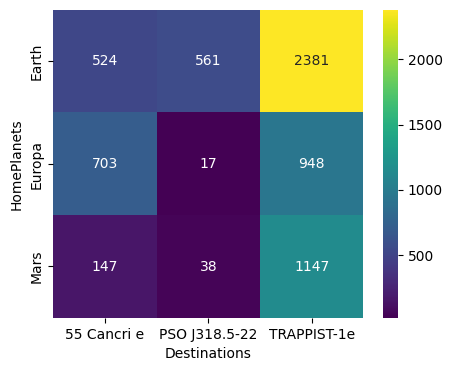

In [419]:
data_counts = data_raw.groupby(["HomePlanet","Destination"]).size().unstack(fill_value=0)


planets = data_counts.columns
destinations = data_counts.index
tablica = data_counts.values

fig,ax = plt.subplots(figsize=(5,4))

sns.heatmap(tablica,annot=True,cmap="viridis",fmt="d",xticklabels=planets,yticklabels=destinations,ax=ax)

ax.set_ylabel("HomePlanets")
ax.set_xlabel("Destinations")

<BarContainer object of 2 artists>

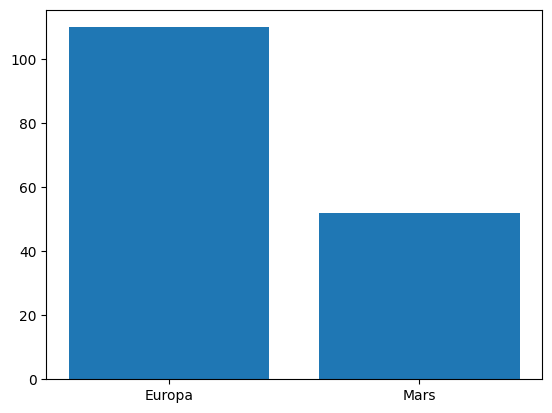

In [230]:
vip_true_df = data_raw.loc[data_raw["VIP"]==True]

vip_true_df["HomePlanet"].value_counts().index

plt.bar(vip_true_df["HomePlanet"].value_counts().index,vip_true_df["HomePlanet"].value_counts().values)

In [487]:
data_raw

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
6462,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
6463,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
6464,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [506]:
sum_df= data_raw[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].sum(axis=1)
sum_df

0           0.0
1         736.0
2       10383.0
3        5176.0
4        1091.0
         ...   
6461     8536.0
6462        0.0
6463     1873.0
6464     4637.0
6465     4826.0
Length: 6466, dtype: float64

In [371]:
def text_split(input,at):
    parts = input.split('/')
    return parts[at]

data_raw["Deck"]=data_raw["Cabin"].map(lambda x:text_split(x,0)).values

data_raw["Num"] = data_raw["Cabin"].map(lambda x: text_split(x,1)).values

data_raw["Side"] = data_raw["Cabin"].map(lambda x: text_split(x,2)).values

F


In [478]:
data_table = data_raw.loc[(data_raw['Age']<20) & (10<data_raw['Age'])][["Age","ShoppingMall","VRDeck","RoomService"]]
data_table

,Age,ShoppingMall,VRDeck,RoomService
2,58.0,0.0,49.0,43.0
31,55.0,0.0,0.0,0.0
35,56.0,0.0,127.0,0.0
65,54.0,0.0,637.0,0.0
96,56.0,0.0,0.0,0.0
...,...,...,...,...
6372,56.0,0.0,0.0,0.0
6398,54.0,71.0,1054.0,724.0
6400,54.0,0.0,0.0,65.0
6403,53.0,0.0,70.0,49.0


[]

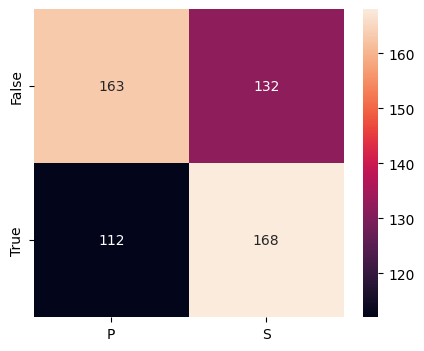

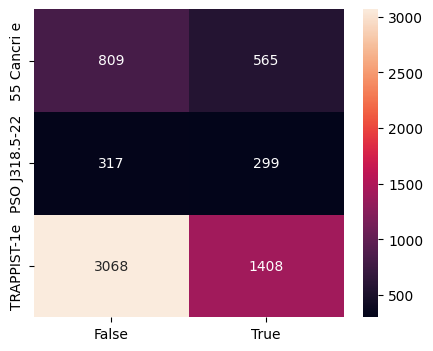

In [502]:
df = data_raw.loc[data_raw['Age']>50]
df_home_cry = df.groupby(["Transported","Side"]).size().unstack(fill_value=0)

df_home_cry.columns
df_home_cry.index
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(df_home_cry.values,annot=True,fmt="d",ax=ax,xticklabels=df_home_cry.columns,yticklabels=df_home_cry.index)
plt.plot()
df_home_cry = data_raw.groupby(["Destination","CryoSleep"]).size().unstack(fill_value=0)

df_home_cry.columns
df_home_cry.index
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(df_home_cry.values,annot=True,fmt="d",ax=ax,xticklabels=df_home_cry.columns,yticklabels=df_home_cry.index)
plt.plot()